In [1]:
import skfda
import numpy as np
import pandas as pd
import statistics
from os import listdir
from sklearn import preprocessing
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
def clustering(data, participants, f): 
    
    cost = []
    silhouette = []

    for i in range(2, participants):
        fuzzy_kmeans = skfda.ml.clustering.FuzzyCMeans(n_clusters=i, fuzzifier=f, random_state=0)
        fd = skfda.FDataGrid(data)
        fuzzy_kmeans.fit(fd)
        #kmeans.fit_predict(data)
        
        # Calculate Silhoutte Score
        score = silhouette_score(data, fuzzy_kmeans.labels_, metric='euclidean')
        silhouette.append(score)
    
        # Calculates squared error for the clustered points
        cost.append(fuzzy_kmeans.inertia_)    
        
    # Plot the cost against K values
    plt.plot(range(2, participants), cost, color ='g', linewidth ='3')
    plt.xlabel("Value of K")
    plt.ylabel("Squared Error (Cost)")
    plt.show() # clear the plot
    
    # Plot the Silhouette Score against K values
    plt.plot(range(2, participants), silhouette, color ='b', linewidth ='3')
    plt.xlabel("Value of K")
    plt.ylabel("Silhouette Score")
    plt.show() # clear the plot
    # the point of the elbow is the
    # most optimal value for choosing k
    


## LifeSnaps

In [3]:
lifesnaps = pd.read_csv("Final_CSVs/lifesnaps_new.csv")
lifesnaps_personality = pd.read_csv('../scored_surveys/personality.csv')

In [4]:
lifesnaps_personality = lifesnaps_personality.drop(["Unnamed: 0", "submitdate"], axis = 1)
lifesnaps_personality = lifesnaps_personality.drop("type", axis = 1)
lifesnaps_personality.rename(columns={"user_id": "id"}, inplace=True)

In [5]:
lifesnaps_personality

,id,extraversion,agreeableness,conscientiousness,stability,intellect,gender,ipip_extraversion_category,ipip_agreeableness_category,ipip_conscientiousness_category,ipip_stability_category,ipip_intellect_category
0,621e2e8e67b776a24055b564,21.0,33.0,45.0,42.0,40.0,MALE,LOW,LOW,HIGH,HIGH,AVERAGE
1,621e2eaf67b776a2406b14ac,32.0,45.0,30.0,18.0,41.0,FEMALE,AVERAGE,HIGH,AVERAGE,LOW,HIGH
2,621e2ed667b776a24085d8d1,40.0,43.0,22.0,28.0,34.0,FEMALE,HIGH,AVERAGE,LOW,AVERAGE,AVERAGE
3,621e2f3967b776a240c654db,25.0,34.0,30.0,39.0,37.0,MALE,AVERAGE,AVERAGE,LOW,HIGH,AVERAGE
4,621e2f6167b776a240e082a9,41.0,41.0,30.0,34.0,30.0,FEMALE,HIGH,AVERAGE,AVERAGE,HIGH,LOW
5,621e2f7a67b776a240f14425,29.0,38.0,43.0,39.0,35.0,MALE,AVERAGE,AVERAGE,HIGH,HIGH,AVERAGE
6,621e2f9167b776a240011ccb,21.0,45.0,31.0,18.0,39.0,FEMALE,LOW,HIGH,AVERAGE,LOW,HIGH
7,621e2fb367b776a24015accd,37.0,36.0,29.0,27.0,41.0,MALE,HIGH,AVERAGE,LOW,LOW,HIGH
8,621e2fce67b776a240279baa,34.0,42.0,35.0,27.0,35.0,MALE,HIGH,HIGH,AVERAGE,LOW,AVERAGE
9,621e2ff067b776a2403eb737,33.0,44.0,23.0,11.0,30.0,FEMALE,AVERAGE,HIGH,LOW,LOW,LOW


In [6]:
le = preprocessing.LabelEncoder()

lifesnaps_personality['gender'] = le.fit_transform(lifesnaps_personality['gender'])
lifesnaps_personality['ipip_extraversion_category'] = le.fit_transform(lifesnaps_personality['ipip_extraversion_category'])
lifesnaps_personality['ipip_agreeableness_category'] = le.fit_transform(lifesnaps_personality['ipip_agreeableness_category'])
lifesnaps_personality['ipip_conscientiousness_category'] = le.fit_transform(lifesnaps_personality['ipip_conscientiousness_category'])
lifesnaps_personality['ipip_stability_category'] = le.fit_transform(lifesnaps_personality['ipip_stability_category'])
lifesnaps_personality['ipip_intellect_category'] = le.fit_transform(lifesnaps_personality['ipip_intellect_category'])

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
lifesnaps_personality[["extraversion", "agreeableness", "conscientiousness", "stability", "intellect", "gender"]] = scaler.fit_transform(lifesnaps_personality[["extraversion", "agreeableness", "conscientiousness", "stability", "intellect", "gender"]])

In [8]:
lifesnaps

,ENTERTAINMENT,GYM,HOME,HOME1OFFICE,OTHER,OUTDOORS,TRANSIT,WORK/SCHOOL,age,bmi,...,very1active1minutes,week,week1cos,week1sin,weekday,weekday1cos,weekday1sin,year,dataset,stress
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,23.0,...,20.0,22,-0.988831,-1.490423e-01,4,-0.900969,-0.433884,2021,Train,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,22.0,...,NaN,28,-0.500000,-8.660254e-01,0,1.000000,0.000000,2021,Train,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,20.0,...,109.0,50,0.365341,9.308737e-01,5,-0.222521,-0.974928,2021,Train,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,21.0,...,0.0,35,0.500000,-8.660254e-01,4,-0.900969,-0.433884,2021,Train,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30.0,...,0.0,26,-0.733052,-6.801727e-01,5,-0.222521,-0.974928,2021,Train,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,2,0.955573,2.947552e-01,5,-0.222521,-0.974928,2022,Test,0
7406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,24.0,...,0.0,28,-0.500000,-8.660254e-01,1,0.623490,0.781831,2021,Test,0
7407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,18.0,...,0.0,51,0.222521,9.749279e-01,4,-0.900969,-0.433884,2021,Test,0
7408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30.0,...,0.0,32,0.074730,-9.972038e-01,4,-0.900969,-0.433884,2021,Test,0


In [9]:
lifesnaps_all_features = lifesnaps.loc[:, ~lifesnaps.columns.isin(['stress', 'dataset', 'ENTERTAINMENT', 'GYM', 'HOME', 'HOME1OFFICE', 'OTHER', 'OUTDOORS',
       'TRANSIT', 'WORK/SCHOOL','month', 'month1cos', 'month1sin', 'week', 'week1cos', 'week1sin', 'weekday', 'weekday1cos', 'weekday1sin', 'year', 'day', 'day1cos', 'day1sin'])]
lifesnaps_all_features

,age,bmi,bpm,calories,daily1temperature1variation,distance,filteredDemographicVO2Max,full1sleep1breathing1rate,gender,id,...,sleep1duration,sleep1efficiency,sleep1light1ratio,sleep1rem1ratio,sleep1wake1ratio,spo2,step1goal,step1goal1label,steps,very1active1minutes
0,1.0,23.0,91.659123,3241.52,-0.460087,9275.7,48.07785,NaN,0.0,621e329067b776a2402ffad2,...,21360000.0,95.0,0.689119,1.179104,1.378378,NaN,9999.0,4.0,12974.0,20.0
1,1.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,621e2f1b67b776a240b3d87c,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,20.0,90.021444,2523.09,-1.986618,6187.5,49.72347,11.6,1.0,621e339967b776a240e502de,...,30780000.0,98.0,0.970954,1.364583,0.732394,94.9,NaN,NaN,17479.0,109.0
3,0.0,21.0,NaN,1800.00,NaN,NaN,NaN,NaN,0.0,621e332267b776a24092a584,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,1.0,30.0,NaN,2318.40,NaN,NaN,NaN,NaN,0.0,621e32d967b776a240627414,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405,NaN,NaN,82.571340,1429.29,NaN,1723.5,36.39159,NaN,NaN,621e346f67b776a24081744f,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2595.0,10.0
7406,0.0,24.0,NaN,1612.80,NaN,NaN,NaN,NaN,0.0,621e34ec67b776a240d60873,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7407,0.0,18.0,NaN,1713.60,NaN,NaN,NaN,NaN,0.0,621e309267b776a240ae1cdb,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7408,1.0,30.0,NaN,2318.40,NaN,NaN,NaN,NaN,0.0,621e32d967b776a240627414,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [10]:
lifesnaps_mean = lifesnaps_all_features.groupby('id', as_index = False, group_keys = True).mean()
lifesnaps_mean.columns = map(lambda x: x + '_mean', lifesnaps_mean.columns)
lifesnaps_mean = lifesnaps_mean.rename({'id_mean': 'id'}, axis='columns')
lifesnaps_mean

lifesnaps_min = lifesnaps_all_features.groupby('id', as_index = False, group_keys = True).min()
lifesnaps_min.columns = map(lambda x: x + '_min', lifesnaps_min.columns)
lifesnaps_min = lifesnaps_min.rename({'id_min': 'id'}, axis='columns')
lifesnaps_min

lifesnaps_std = lifesnaps_all_features.groupby('id', as_index = False, group_keys = True).std()
lifesnaps_std.columns = map(lambda x: x + '_std', lifesnaps_std.columns)
lifesnaps_std = lifesnaps_std.rename({'id_std': 'id'}, axis='columns')
lifesnaps_std

,id,age_std,bmi_std,bpm_std,calories_std,daily1temperature1variation_std,distance_std,filteredDemographicVO2Max_std,full1sleep1breathing1rate_std,gender_std,...,sleep1duration_std,sleep1efficiency_std,sleep1light1ratio_std,sleep1rem1ratio_std,sleep1wake1ratio_std,spo2_std,step1goal_std,step1goal1label_std,steps_std,very1active1minutes_std
0,621e2e8e67b776a24055b564,0.0,0.0,3.115235,268.393641,0.570898,2495.171517,0.593936,0.569264,0.0,...,3.470355e+06,2.005752,0.159124,0.250086,0.188958,NaN,2708.012802,0.847319,3384.097986,16.297671
1,621e2eaf67b776a2406b14ac,0.0,0.0,3.885394,361.985428,0.593731,4162.391371,1.380626,0.536698,0.0,...,5.942277e+06,2.696577,0.282058,0.361365,0.329824,NaN,0.000000,0.000000,5973.028379,22.312539
2,621e2ed667b776a24085d8d1,0.0,0.0,4.278665,191.883956,0.644815,1739.393218,0.797480,5.797068,0.0,...,5.434833e+06,3.405877,0.230605,0.411375,0.348230,NaN,3228.233061,1.015038,2616.982198,5.371150
3,621e2ef567b776a24099f889,0.0,0.0,18.439423,421.581261,NaN,3374.706124,0.414427,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4842.354770,13.890850
4,621e2efa67b776a2409dd1c3,0.0,0.0,6.611945,444.840078,0.723875,3454.517701,1.348074,NaN,0.0,...,6.156437e+06,2.541268,0.200754,0.321502,0.256729,0.972034,NaN,NaN,4858.421862,16.780661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,621e36c267b776a240ba2756,0.0,0.0,6.067612,572.812881,0.488540,3393.013595,0.457191,NaN,0.0,...,5.411164e+06,2.297508,0.239305,0.303629,0.331738,NaN,2758.602927,0.841897,4245.010432,29.729212
67,621e36dd67b776a240ce9a45,0.0,0.0,8.715774,559.326386,NaN,3791.787320,1.157102,NaN,0.0,...,2.949983e+06,1.154701,NaN,NaN,NaN,NaN,1602.554779,0.426401,4911.054001,29.397413
68,621e36f967b776a240e5e7c9,0.0,0.0,6.304942,401.149188,0.634171,4012.881654,0.415635,0.494495,0.0,...,4.873251e+06,1.878103,0.164576,0.225304,0.214419,0.738650,3587.519432,0.939575,5844.593245,29.616532
69,621e375367b776a24021e950,0.0,0.0,7.967566,560.583292,1.701892,3050.448676,0.364927,NaN,0.0,...,1.062868e+07,0.971825,NaN,NaN,NaN,NaN,NaN,NaN,4227.040783,19.739210


In [11]:

scaler = StandardScaler()

lifesnaps_mean.loc[:, lifesnaps_mean.columns!='id'] = scaler.fit_transform(lifesnaps_mean.loc[:, lifesnaps_mean.columns!='id'])
lifesnaps_min.loc[:, lifesnaps_min.columns!='id'] = scaler.fit_transform(lifesnaps_min.loc[:, lifesnaps_min.columns!='id'])
lifesnaps_std.loc[:, lifesnaps_std.columns!='id'] = scaler.fit_transform(lifesnaps_std.loc[:, lifesnaps_std.columns!='id'])

In [12]:
lifesnaps_all_grouped = pd.merge(lifesnaps_mean, lifesnaps_personality, on='id')
lifesnaps_all_grouped = pd.merge(lifesnaps_min, lifesnaps_all_grouped, on='id')
lifesnaps_all_grouped = pd.merge(lifesnaps_std, lifesnaps_all_grouped, on='id')

In [13]:
lifesnaps_all_grouped

,id,age_std,bmi_std,bpm_std,calories_std,daily1temperature1variation_std,distance_std,filteredDemographicVO2Max_std,full1sleep1breathing1rate_std,gender_std,...,agreeableness,conscientiousness,stability,intellect,gender,ipip_extraversion_category,ipip_agreeableness_category,ipip_conscientiousness_category,ipip_stability_category,ipip_intellect_category
0,621e2e8e67b776a24055b564,0.0,0.0,-1.110783,-1.002972,-0.415743,-0.705350,-0.186683,-0.765453,0.0,...,-0.839454,1.688241,1.501184,0.651920,0.816497,2,2,1,1,0
1,621e2eaf67b776a2406b14ac,0.0,0.0,-0.876672,-0.540978,-0.325256,0.837708,1.633165,-0.782661,0.0,...,1.068396,-0.502383,-1.461679,0.843661,-1.224745,0,1,0,2,1
2,621e2ed667b776a24085d8d1,0.0,0.0,-0.757127,-1.380645,-0.122808,-1.404843,0.284176,1.996907,0.0,...,0.750421,-1.670716,-0.227153,-0.498527,-1.224745,1,0,2,0,0
3,621e2f3967b776a240c654db,0.0,0.0,0.220415,0.068573,0.615941,-0.472026,0.723346,1.977221,0.0,...,-0.680467,-0.502383,1.130826,0.076696,0.816497,0,0,2,1,0
4,621e2f6167b776a240e082a9,0.0,0.0,0.333876,-0.530164,0.466479,-0.358932,-0.335899,-0.627364,0.0,...,0.432446,-0.502383,0.513563,-1.265492,-1.224745,1,0,0,1,2
5,621e2f7a67b776a240f14425,0.0,0.0,1.676134,1.777261,-0.096650,1.375064,-1.098944,NaN,0.0,...,-0.044517,1.396158,1.130826,-0.306786,0.816497,0,0,1,1,0
6,621e2f9167b776a240011ccb,0.0,0.0,-0.890859,-1.445400,-0.246466,-1.519221,-0.421096,-0.761567,0.0,...,1.068396,-0.356341,-1.461679,0.460179,-1.224745,2,1,0,2,1
7,621e2fb367b776a24015accd,0.0,0.0,0.844661,-0.142981,0.869333,-0.347274,-0.779647,NaN,0.0,...,-0.362492,-0.648425,-0.350606,0.843661,0.816497,1,0,2,2,1
8,621e2fce67b776a240279baa,0.0,0.0,-0.186988,0.884608,-0.688576,0.398916,-0.021646,-0.624967,0.0,...,0.591434,0.227825,-0.350606,-0.306786,0.816497,1,1,0,2,0
9,621e2ff067b776a2403eb737,0.0,0.0,-1.220759,-0.484167,-0.276172,-1.262243,-0.702450,NaN,0.0,...,0.909409,-1.524674,-2.325848,-1.265492,-1.224745,0,1,2,2,2


In [14]:
# Keep user IDs in a separate datarame

ids = lifesnaps_all_grouped["id"]
lifesnaps_all_grouped = lifesnaps_all_grouped.drop("id", axis = 1)

In [15]:
lifesnaps_all_grouped = lifesnaps_all_grouped.dropna(axis='columns')

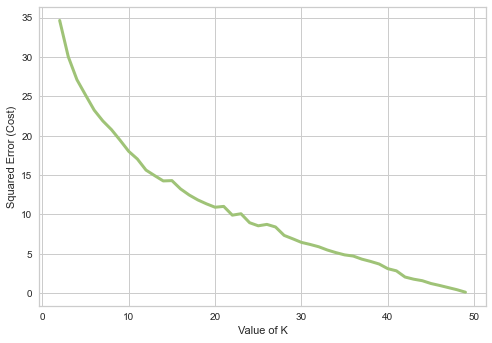

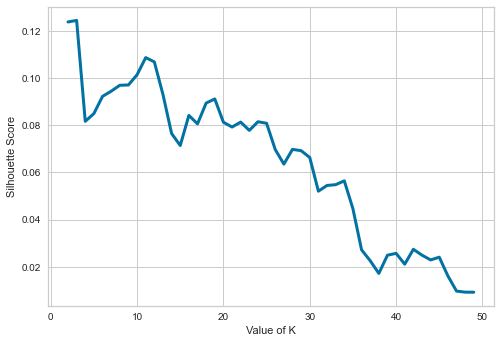

In [16]:
clustering(lifesnaps_all_grouped, 50, f = 1.3)

In [17]:
fuzzy_kmeans = skfda.ml.clustering.FuzzyCMeans(n_clusters=8,fuzzifier=1.3, random_state=0)
fd = skfda.FDataGrid(lifesnaps_all_grouped)
fuzzy_kmeans.fit(fd)
clusters = fuzzy_kmeans.membership_degree_ 

In [221]:
#lifesnaps

In [222]:
unique_participants = lifesnaps["id"].unique()

In [19]:
fuzzy_clustering = pd.concat([ids, pd.DataFrame(clusters)], axis=1)
fuzzy_clustering

,id,0,1,2,3,4,5,6,7
0,621e2e8e67b776a24055b564,0.009927,0.014490,0.039282,0.021182,0.022814,0.055106,0.531590,0.305610
1,621e2eaf67b776a2406b14ac,0.000696,0.000577,0.001396,0.972094,0.002959,0.013354,0.007682,0.001243
2,621e2ed667b776a24085d8d1,0.010038,0.020462,0.003925,0.001314,0.955551,0.001108,0.005570,0.002031
3,621e2f3967b776a240c654db,0.004034,0.006702,0.949007,0.000803,0.005498,0.002039,0.010357,0.021560
4,621e2f6167b776a240e082a9,0.012888,0.024069,0.020428,0.004879,0.887009,0.003312,0.028579,0.018835
5,621e2f7a67b776a240f14425,0.002315,0.007090,0.042638,0.001040,0.004353,0.003622,0.013925,0.925016
6,621e2f9167b776a240011ccb,0.043266,0.061054,0.026636,0.024957,0.707224,0.006867,0.110602,0.019394
7,621e2fb367b776a24015accd,0.008308,0.012656,0.821324,0.003260,0.032071,0.006655,0.089960,0.025766
8,621e2fce67b776a240279baa,0.083045,0.079765,0.162255,0.085069,0.109890,0.172763,0.208864,0.098350
9,621e2ff067b776a2403eb737,0.029045,0.086423,0.034701,0.025536,0.745633,0.017114,0.042547,0.019002


<AxesSubplot:>

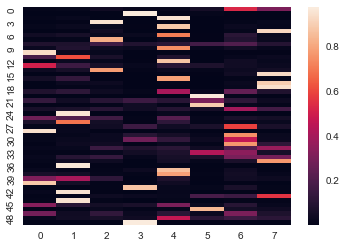

In [21]:
import seaborn as sns
%matplotlib inline

df = pd.DataFrame(clusters)
#Index= ['aaa', 'bbb', 'ccc', 'ddd', 'eee']
#Cols = ['A', 'B', 'C', 'D']


sns.heatmap(df, annot=False)

In [168]:
#for index, participant in fuzzy_clustering.iterrows():
#    for i in range(1, len(participant)):
#        print(i)

In [224]:
lifesnaps_final = pd.DataFrame()

for index, participant in fuzzy_clustering.iterrows():
    for i in range(1, len(participant)):
        temp = lifesnaps.loc[lifesnaps['id'] == participant['id']].sample(frac = participant[i-1], replace = False)
        temp["Cluster"] = i-1
        lifesnaps_final = pd.concat([lifesnaps_final, temp], axis=0)
        


In [225]:
lifesnaps

,ENTERTAINMENT,GYM,HOME,HOME1OFFICE,OTHER,OUTDOORS,TRANSIT,WORK/SCHOOL,age,bmi,...,very1active1minutes,week,week1cos,week1sin,weekday,weekday1cos,weekday1sin,year,dataset,stress
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,23.0,...,20.0,22,-0.988831,-1.490423e-01,4,-0.900969,-0.433884,2021,Train,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,22.0,...,NaN,28,-0.500000,-8.660254e-01,0,1.000000,0.000000,2021,Train,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,20.0,...,109.0,50,0.365341,9.308737e-01,5,-0.222521,-0.974928,2021,Train,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,21.0,...,0.0,35,0.500000,-8.660254e-01,4,-0.900969,-0.433884,2021,Train,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30.0,...,0.0,26,-0.733052,-6.801727e-01,5,-0.222521,-0.974928,2021,Train,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,2,0.955573,2.947552e-01,5,-0.222521,-0.974928,2022,Test,0
7406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,24.0,...,0.0,28,-0.500000,-8.660254e-01,1,0.623490,0.781831,2021,Test,0
7407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,18.0,...,0.0,51,0.222521,9.749279e-01,4,-0.900969,-0.433884,2021,Test,0
7408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30.0,...,0.0,32,0.074730,-9.972038e-01,4,-0.900969,-0.433884,2021,Test,0


In [226]:
lifesnaps_final['Cluster'].value_counts()

4    1154
1     971
6     657
7     652
0     554
2     403
5     379
3     367
Name: Cluster, dtype: int64

In [227]:
lifesnaps_final.to_csv("Final_CSVs/lifesnaps_fuzzy8_13.csv", index = False)